## Arm Reaching (RM Session 1)

In [1]:
import os
import glob
import numpy as np
import mne
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# from google.colab import drive
# drive.mount('/content/drive')
from scipy.io import loadmat
from scipy.signal import butter, lfilter
warnings.filterwarnings('ignore')

### read paths of all .mat files in a list

In [3]:
folder_path=r'D:\Project_EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM'
folder_files=os.listdir(folder_path)
for i in folder_files:
    print(i)

EEG_session1_sub10_reaching_realMove.mat
EEG_session1_sub11_reaching_realMove.mat
EEG_session1_sub12_reaching_realMove.mat
EEG_session1_sub13_reaching_realMove.mat
EEG_session1_sub14_reaching_realMove.mat
EEG_session1_sub15_reaching_realMove.mat
EEG_session1_sub16_reaching_realMove.mat
EEG_session1_sub17_reaching_realMove.mat
EEG_session1_sub18_reaching_realMove.mat
EEG_session1_sub19_reaching_realMove.mat
EEG_session1_sub1_reaching_realMove.mat
EEG_session1_sub20_reaching_realMove.mat
EEG_session1_sub21_reaching_realMove.mat
EEG_session1_sub22_reaching_realMove.mat
EEG_session1_sub23_reaching_realMove.mat
EEG_session1_sub24_reaching_realMove.mat
EEG_session1_sub25_reaching_realMove.mat
EEG_session1_sub2_reaching_realMove.mat
EEG_session1_sub3_reaching_realMove.mat
EEG_session1_sub4_reaching_realMove.mat
EEG_session1_sub5_reaching_realMove.mat
EEG_session1_sub6_reaching_realMove.mat
EEG_session1_sub7_reaching_realMove.mat
EEG_session1_sub8_reaching_realMove.mat
EEG_session1_sub9_reachi

In [4]:
matfiles=[]
for i in folder_files:
    file=folder_path+'\\'+i
    matfiles.append(file) 
for i in matfiles:
    print(i)

D:\Project_EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub10_reaching_realMove.mat
D:\Project_EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub11_reaching_realMove.mat
D:\Project_EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub12_reaching_realMove.mat
D:\Project_EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub13_reaching_realMove.mat
D:\Project_EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub14_reaching_realMove.mat
D:\Project_EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub15_reaching_realMove.mat
D:\Project_EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub16_reaching_realMove.mat
D:\Project_EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub17_reaching_realMove.mat
D:\Project_EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_su

### explore all keys for a file

In [5]:
temp = loadmat(matfiles[0])
temp.keys()

dict_keys(['__header__', '__version__', '__globals__', 'mrk', 'mnt', 'nfo', 'ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 'ch9', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch16', 'ch17', 'ch18', 'ch19', 'ch20', 'ch21', 'ch22', 'ch23', 'ch24', 'ch25', 'ch26', 'ch27', 'ch28', 'ch29', 'ch30', 'ch31', 'ch32', 'ch33', 'ch34', 'ch35', 'ch36', 'ch37', 'ch38', 'ch39', 'ch40', 'ch41', 'ch42', 'ch43', 'ch44', 'ch45', 'ch46', 'ch47', 'ch48', 'ch49', 'ch50', 'ch51', 'ch52', 'ch53', 'ch54', 'ch55', 'ch56', 'ch57', 'ch58', 'ch59', 'ch60', 'dat'])

In [6]:
col=1
for i in temp['nfo'][0][0][0][0]:
    print('ch'+str(col),' : ',i[0],end = '\n')
    col+=1
del temp

ch1  :  Fp1
ch2  :  AF7
ch3  :  AF3
ch4  :  AFz
ch5  :  F7
ch6  :  F5
ch7  :  F3
ch8  :  F1
ch9  :  Fz
ch10  :  FT7
ch11  :  FC5
ch12  :  FC3
ch13  :  FC1
ch14  :  T7
ch15  :  C5
ch16  :  C3
ch17  :  C1
ch18  :  Cz
ch19  :  TP7
ch20  :  CP5
ch21  :  CP3
ch22  :  CP1
ch23  :  CPz
ch24  :  P7
ch25  :  P5
ch26  :  P3
ch27  :  P1
ch28  :  Pz
ch29  :  PO7
ch30  :  PO3
ch31  :  POz
ch32  :  Fp2
ch33  :  AF4
ch34  :  AF8
ch35  :  F2
ch36  :  F4
ch37  :  F6
ch38  :  F8
ch39  :  FC2
ch40  :  FC4
ch41  :  FC6
ch42  :  FT8
ch43  :  C2
ch44  :  C4
ch45  :  C6
ch46  :  T8
ch47  :  CP2
ch48  :  CP4
ch49  :  CP6
ch50  :  TP8
ch51  :  P2
ch52  :  P4
ch53  :  P6
ch54  :  P8
ch55  :  PO4
ch56  :  PO8
ch57  :  O1
ch58  :  Oz
ch59  :  O2
ch60  :  Iz


### to_data_frame() :
- prepare a file in data frame
- map the labels correctly for their trials
- drop unnecessary channels
- take selected count of trials

In [7]:
def to_data_frame(matfile,selected_channels,number_of_trials,downsampling_step=1):

    #load the mat file
    data = loadmat(matfile)

    #new data frame to extract the target data
    df=pd.DataFrame()

    #the scientific name for the selected electrodes
    selected_electrodes=[]
    for i in selected_channels:
        # selected_electrodes.append('ch'+str(i)+'_'+data['nfo'][0][0][0][0][i-1][0])
        selected_electrodes.append(data['nfo'][0][0][0][0][i-1][0])

    #select target channels in the data frame   
    index=0
    for i in selected_electrodes:
        added_channel = pd.DataFrame(data['ch'+str(selected_channels[index])],columns =[i])
        df = pd.concat([df,added_channel],axis=1)
        index+=1

    #add labels col & initialize withe none
    labels = np.empty(data['nfo'][0][0][2][0][0])  # data['nfo'][0][0][2][0][0] --> return number of frames (rows)
    labels.fill(np.nan) 
    trials =np.empty(data['nfo'][0][0][2][0][0])
    trials.fill(np.nan)

    #dictionary for mapping triger events to numbers from 0 to 6 in the same order 
    label_decode ={11:0 , 21:1 , 31:2 , 41:3 , 51:4 , 61:5 , 8:6}

    #labels extraction
    start_point_info = data['mrk'][0][0][5][0][0][0][0][0] 
    end_point_info = data['mrk'][0][0][5][0][0][0][0][1]
    trigger_marking_time = data['mrk'][0][0][0][0]
    trigger_number = data['mrk'][0][0][1][0]
    last_trial ={0:0 , 1:0 , 2:0 , 3:0 , 4:0 , 5:0 , 6:0}

    
    for i in range (0,data['nfo'][0][0][8][0][0]): # data['nfo'][0][0][8][0][0] --> 600 (300 trial + 300 rest period)

        start,end=0,0
        label=label_decode[trigger_number[i]]

        if last_trial[label]==number_of_trials:
            continue

        if i==0:
            start=start_point_info
            end=trigger_marking_time[i]
        elif i==599:
            start=trigger_marking_time[i]
            end=end_point_info
        else:
            start=trigger_marking_time[i-1]
            end=trigger_marking_time[i]
        
        if end-start<18000: # each file has one outlier trial
            last_trial[label]+=1
            if label!=6: # if label refers to one movement, then take only the 4s of the execution of trial and ignore the 3s of visual cue
                for j in range (end-10000,end,downsampling_step):
                    labels[j]=label
                    trials[j]=last_trial[label]
            else:
                for j in range (end-10000,end,downsampling_step):
                    labels[j]=label
                    trials[j]=last_trial[label]  

       
    df=df.assign(Label=labels)
    df=df.assign(Trial=trials)

    #drop rest of rows which didn't assigned to label
    df.dropna(how='any',inplace=True)
     
    return df
    

In [8]:
def to_ndarray(df,selected_channels,number_of_trials,samples_per_trial):

    #intialize ndarray for data (#trials,#channels,#samples) & 1d array for labels
    trials_data = np.empty(shape=(int(len(df)/samples_per_trial) , len(selected_channels) , int(samples_per_trial)))
    trials_labels = []

    trial_no=-1
    counter=0
    for index, row in df.iterrows():
       if counter%samples_per_trial==0:
           trials_labels.append(row[len(selected_channels)])
           trial_no+=1
       for i in range(0,len(selected_channels)):
           trials_data[trial_no][i]=row[i]  
       counter+=1

    trials_labels=tf.keras.utils.to_categorical(trials_labels,num_classes=7)     

    return trials_data , trials_labels
    

In [9]:
chan_names = ["Fp1", "AF3","F7","F3","FC1","FC5","T7","C3","CP1","CP5","P7","P3","Pz", 
              "PO3", "O1","Oz","O2","PO4","P4","P8","P6","CP2","C4", "T8","FC6","FC2",
              "F4",  "F8","AF4","Fp2","Fz","Cz"] 
selected_channels=[1,3,5,7,9,11,13,14,16,18,20,22,24,26,28,30,32,33,36,38,39,41,44,46,47,52,53,54,55,57,58,59]
labels_codes ={0:'Forward' , 1:'Backward' , 2:'Left' , 3:'Right' , 4:'Up' , 5:'Down' , 6:'Rest'}
number_of_trials=50  #selected number of trials for each class
sampling_frequency=2500
trial_duration = 4
downsampling_step = 10
samples_per_trial = sampling_frequency * trial_duration / downsampling_step

In [10]:
df=pd.DataFrame()
for i in range (0,len(matfiles)):
    
    temp=to_data_frame(matfiles[i],selected_channels,number_of_trials,downsampling_step)
    df=pd.concat([df, temp], axis=0)

# df=to_data_frame(matfiles[0],selected_channels,number_of_trials,downsampling_step)

In [11]:
df

,Fp1,AF3,F7,F3,Fz,FC5,FC1,T7,C3,Cz,...,CP2,P4,P6,P8,PO4,O1,Oz,O2,Label,Trial
49428,-3920,-4157,-4118,-12469,536,-2588,4779,-838,-8255,-9350,...,-14800,-634,-2672,-4858,-5525,-5454,-4089,-776,2.0,1.0
49438,-4026,-4163,-4026,-12303,368,-2185,4921,-665,-7701,-9060,...,-14383,-277,-2314,-4594,-5156,-5067,-3725,-567,2.0,1.0
49448,-4116,-4167,-3942,-12126,96,-1811,5025,-511,-7191,-8704,...,-14370,2,-1996,-4374,-4888,-4912,-3651,-442,2.0,1.0
49458,-4188,-4242,-3915,-12144,-274,-1613,4943,-413,-6899,-8405,...,-14739,206,-1715,-4137,-4711,-4819,-3670,-379,2.0,1.0
49468,-4293,-4444,-3970,-12469,-693,-1656,4669,-385,-6907,-8247,...,-15190,475,-1357,-3767,-4471,-4605,-3538,-280,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8477598,21,114,-570,-512,512,-156,-397,-1447,567,-3,...,126,-196,-1204,-775,-142,-245,295,-92,3.0,49.0
8477608,29,99,-525,-372,583,-204,-372,-1540,274,-388,...,-175,-294,-1689,-1254,-360,-342,121,-241,3.0,49.0
8477618,48,95,-388,-140,605,-177,-465,-1503,77,-864,...,-589,-422,-2087,-1670,-613,-449,-111,-449,3.0,49.0
8477628,56,19,-347,8,493,-120,-601,-1393,205,-1029,...,-815,-490,-2280,-1940,-784,-553,-319,-616,3.0,49.0


In [12]:
df['Label'].value_counts()

6.0    1250000
1.0    1240000
0.0    1240000
2.0    1238000
3.0    1233000
4.0    1232000
5.0    1231000
Name: Label, dtype: int64

## Apply bandPass filter

Text(0.5, 1.0, 'data before filtering')

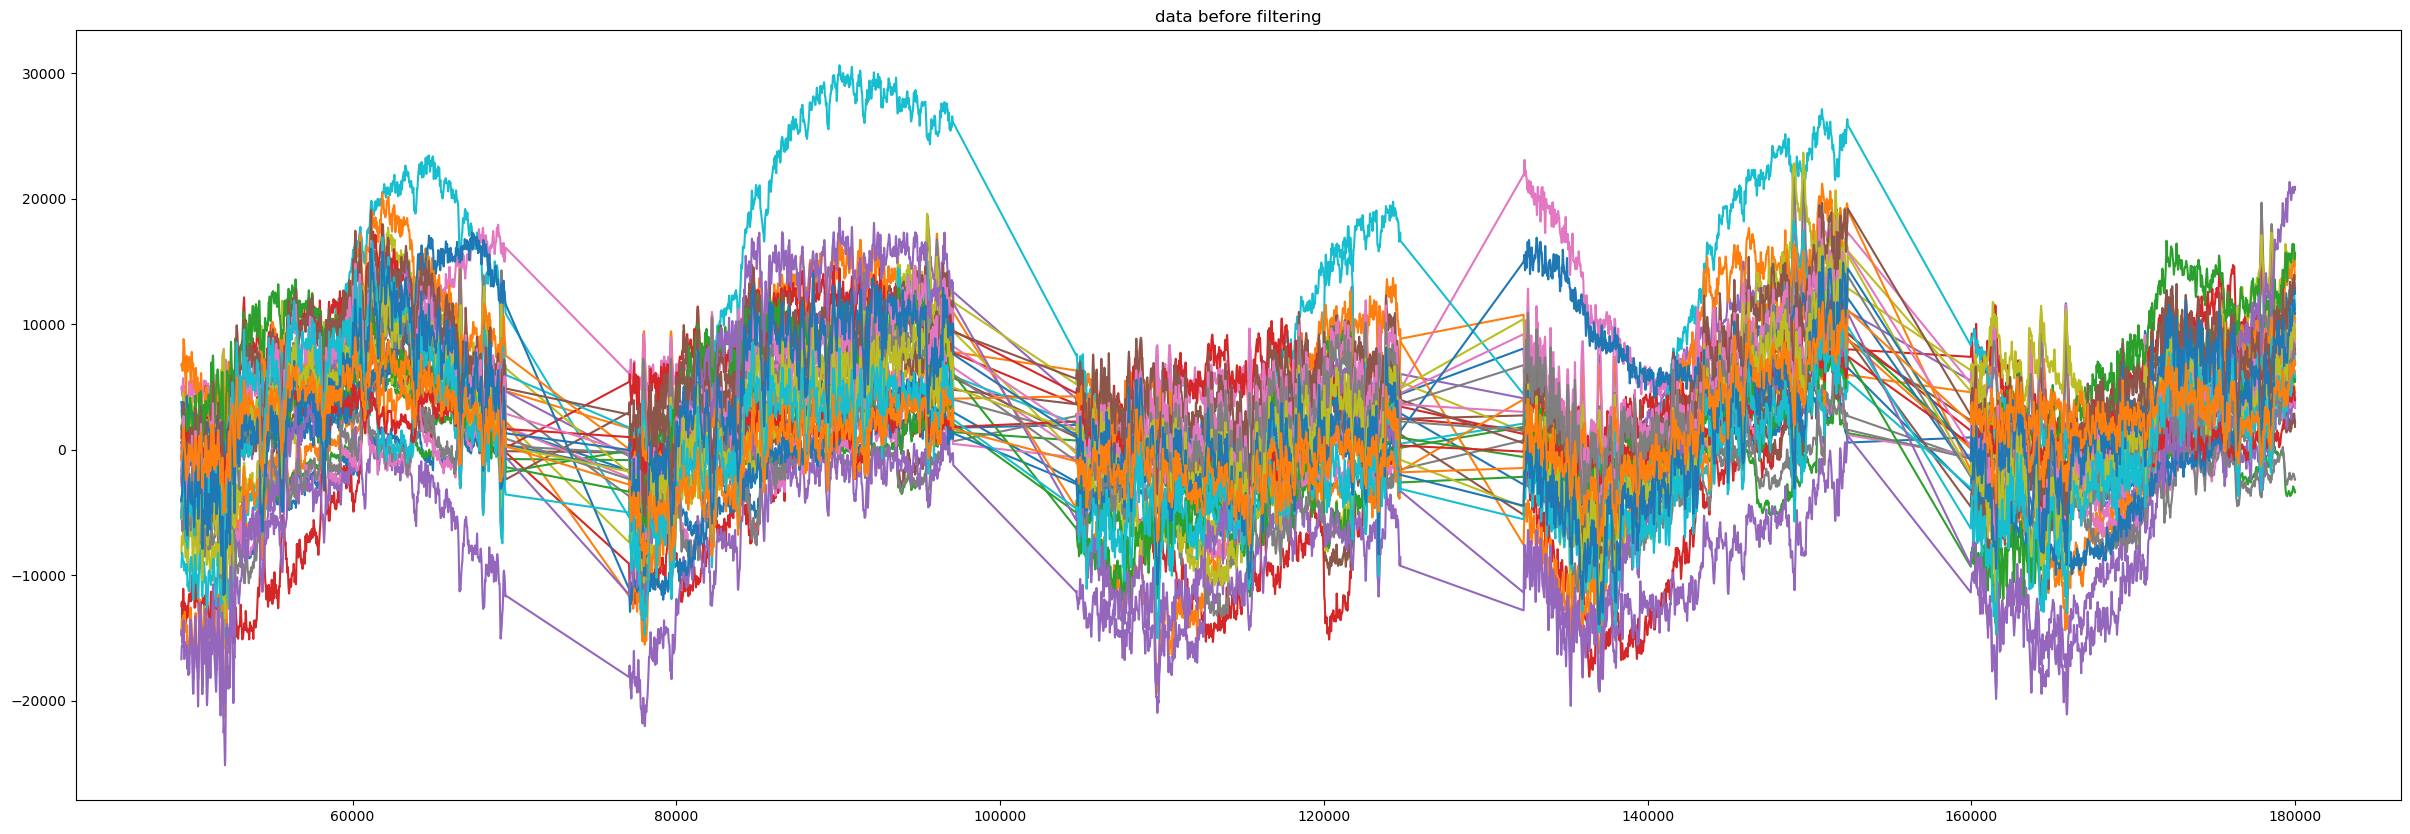

In [13]:
plt.plot(df.iloc[:10000,0:len(selected_channels)])
plt.gcf().set_size_inches(30, 10)
plt.title("data before filtering")

In [14]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [15]:
df.iloc[:,0:len(selected_channels)] = butter_bandpass_filter(df.iloc[:,0:len(selected_channels)].to_numpy() ,8,30,sampling_frequency) # keep only alpha & beta brain waves

Text(0.5, 1.0, 'data after filter')

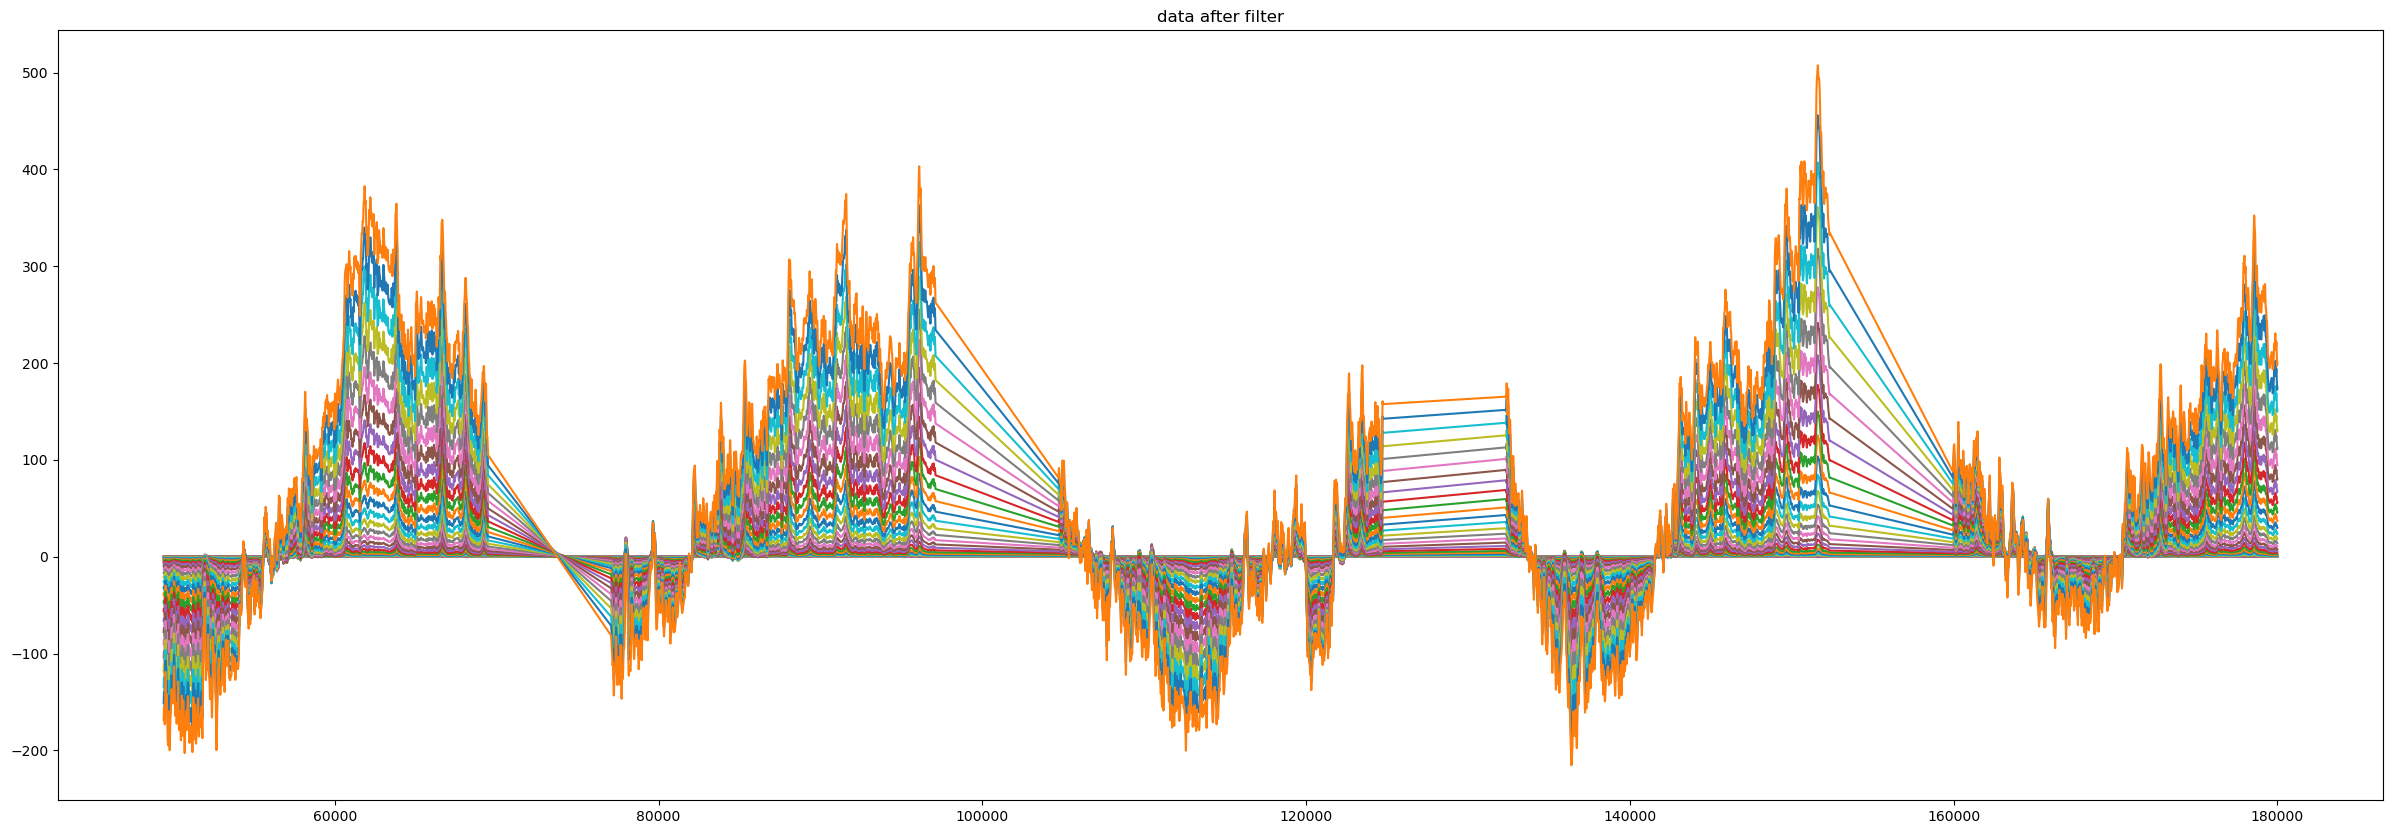

In [16]:
plt.plot(df.iloc[:10000,0:len(selected_channels)])
plt.gcf().set_size_inches(30, 10)
plt.title("data after filter")

## Normalization

In [17]:
features=df.columns[0:len(selected_channels)]
features

Index(['Fp1', 'AF3', 'F7', 'F3', 'Fz', 'FC5', 'FC1', 'T7', 'C3', 'Cz', 'CP5',
       'CP1', 'P7', 'P3', 'Pz', 'PO3', 'Fp2', 'AF4', 'F4', 'F8', 'FC2', 'FC6',
       'C4', 'T8', 'CP2', 'P4', 'P6', 'P8', 'PO4', 'O1', 'Oz', 'O2'],
      dtype='object')

Text(0.5, 1.0, 'data before normalization')

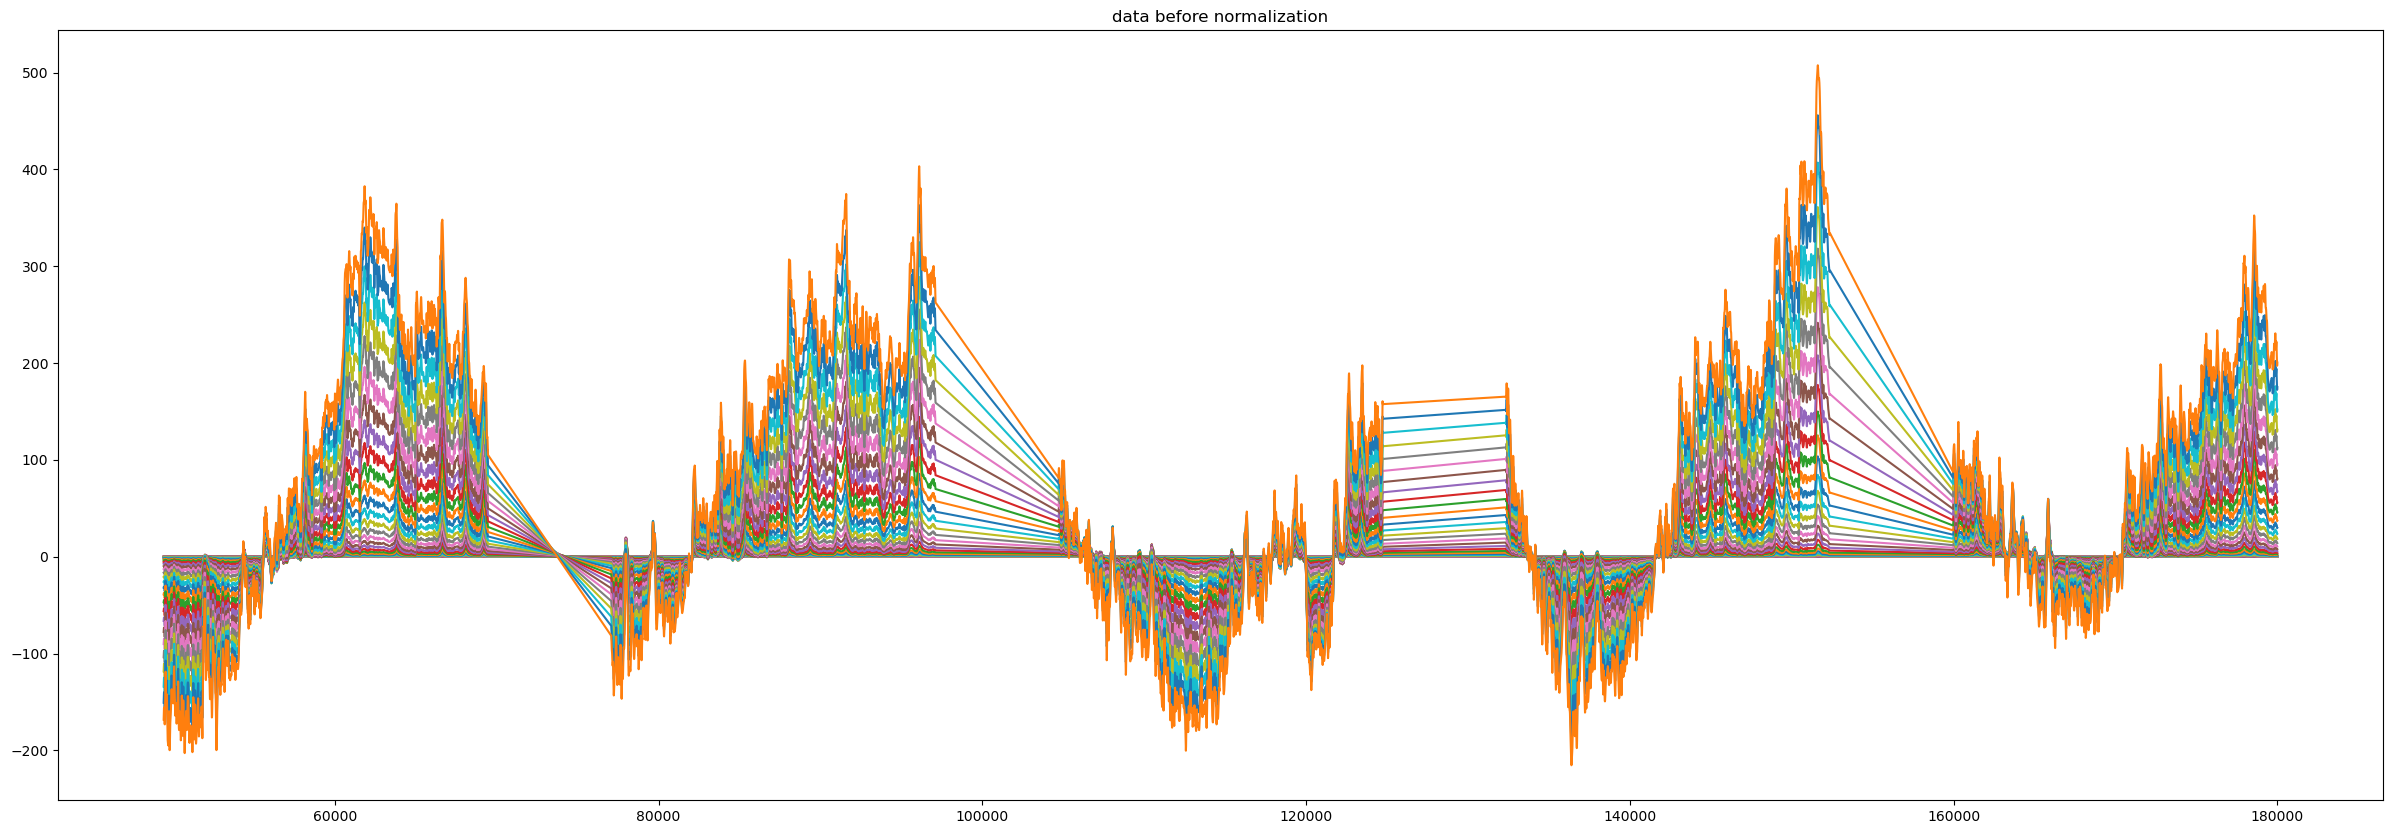

In [18]:
plt.plot(df.iloc[:10000,0:len(selected_channels)])
plt.gcf().set_size_inches(30, 10)
plt.title("data before normalization")

In [19]:
scaler = MinMaxScaler(feature_range=(0,1))
df[features] = scaler.fit_transform(df[features])

In [20]:
df

,Fp1,AF3,F7,F3,Fz,FC5,FC1,T7,C3,Cz,...,CP2,P4,P6,P8,PO4,O1,Oz,O2,Label,Trial
49428,0.439902,0.439496,0.436732,0.431873,0.426047,0.420707,0.416748,0.413514,0.412036,0.411947,...,0.361984,0.355385,0.356428,0.362287,0.367968,0.373533,0.378972,0.384314,2.0,1.0
49438,0.438283,0.438018,0.435405,0.430708,0.425050,0.419874,0.416073,0.412996,0.411676,0.411753,...,0.365685,0.359374,0.360648,0.366693,0.372546,0.378272,0.383861,0.389342,2.0,1.0
49448,0.436909,0.436765,0.434282,0.429730,0.424221,0.419188,0.415517,0.412563,0.411363,0.411565,...,0.368577,0.362473,0.363906,0.370072,0.376032,0.381852,0.387525,0.393080,2.0,1.0
49458,0.435810,0.435660,0.433188,0.428658,0.423167,0.418135,0.414447,0.411462,0.410226,0.410394,...,0.368643,0.362652,0.364188,0.370444,0.376484,0.382373,0.388105,0.393711,2.0,1.0
49468,0.434207,0.433919,0.431329,0.426682,0.421055,0.415857,0.411974,0.408782,0.407330,0.407281,...,0.364965,0.359030,0.360661,0.367032,0.373180,0.379170,0.384996,0.390690,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8477598,0.500069,0.500172,0.498357,0.495534,0.493001,0.491864,0.492406,0.493286,0.495432,0.498424,...,0.478185,0.474224,0.476484,0.482606,0.488511,0.494247,0.499810,0.505230,3.0,49.0
8477608,0.500191,0.500262,0.498431,0.495616,0.493118,0.492037,0.492647,0.493598,0.495809,0.498856,...,0.477132,0.472990,0.475079,0.481042,0.486786,0.492361,0.497763,0.503020,3.0,49.0
8477618,0.500481,0.500520,0.498697,0.495936,0.493534,0.492577,0.493322,0.494401,0.496727,0.499870,...,0.477104,0.472811,0.474747,0.480556,0.486145,0.491562,0.496803,0.501895,3.0,49.0
8477628,0.500603,0.500524,0.498612,0.495803,0.493391,0.492449,0.493222,0.494330,0.496682,0.499847,...,0.477204,0.472898,0.474813,0.480594,0.486147,0.491523,0.496716,0.501754,3.0,49.0


Text(0.5, 1.0, 'data after normalization')

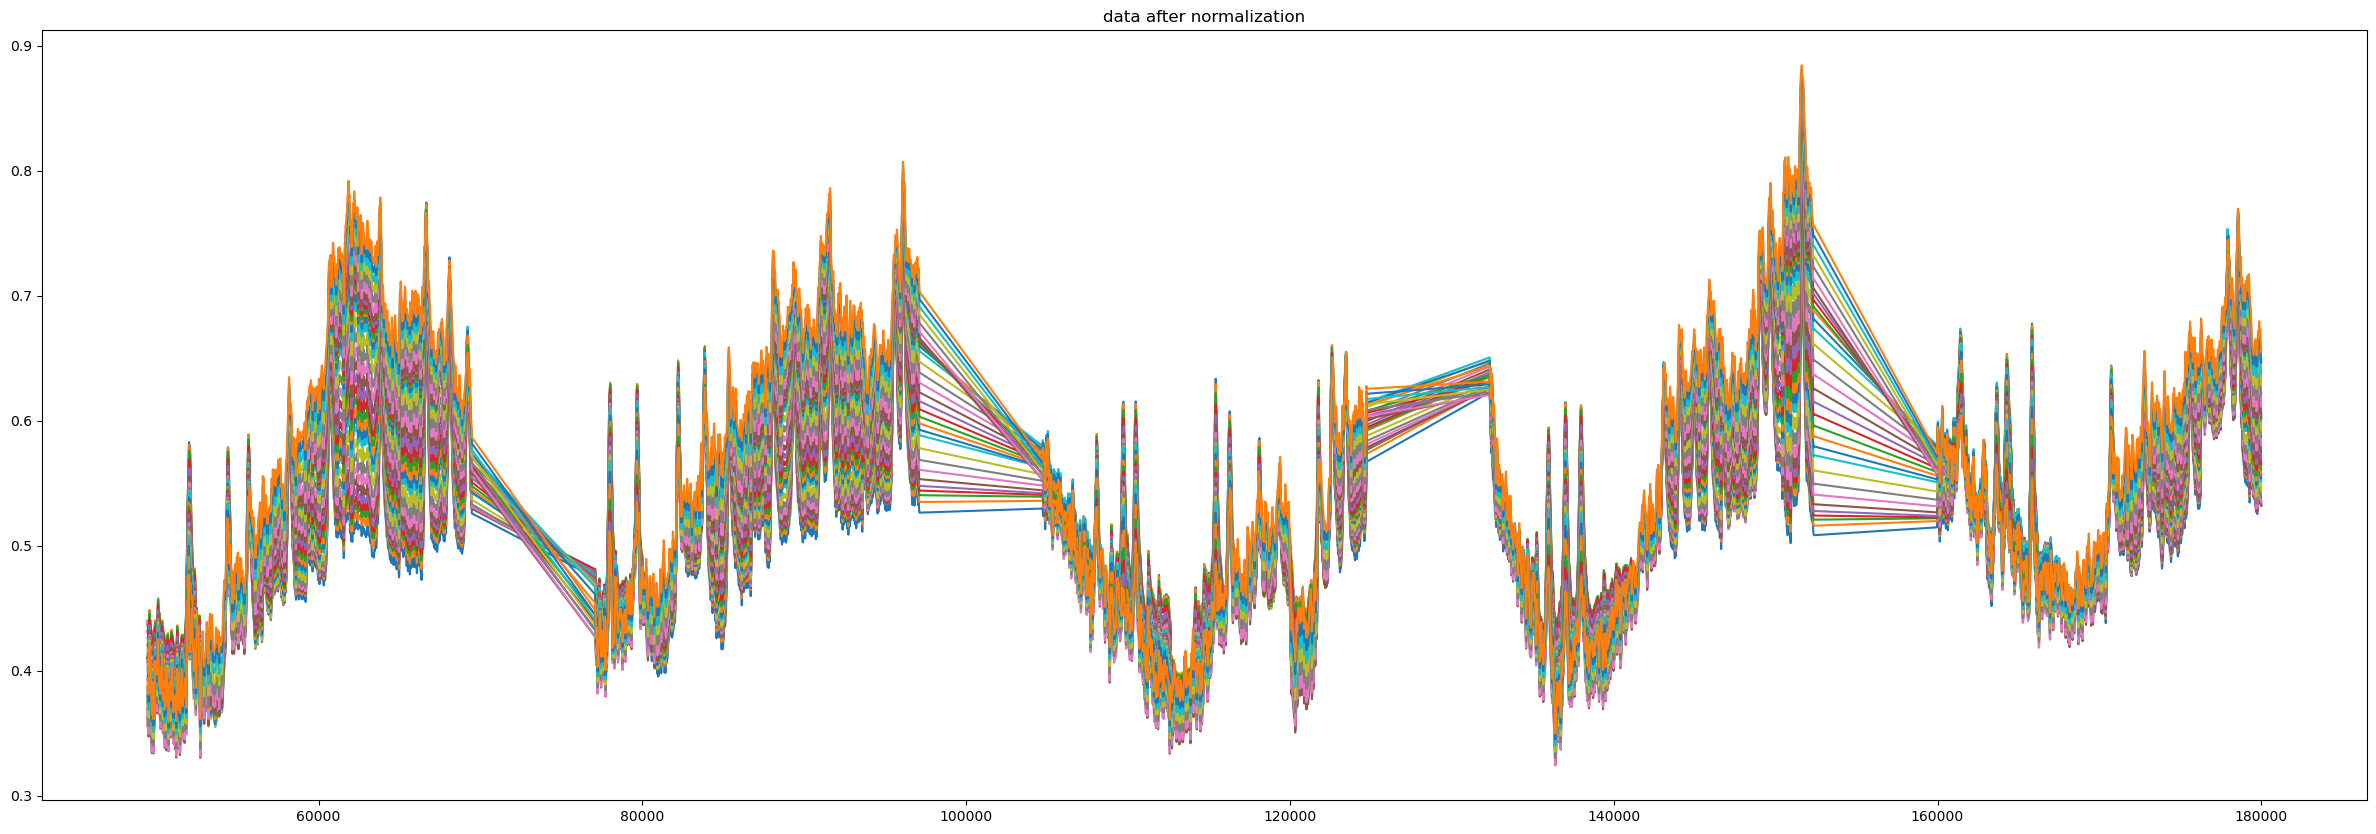

In [21]:
plt.plot(df.iloc[:10000,0:len(selected_channels)])
plt.gcf().set_size_inches(30, 10)
plt.title("data after normalization")

In [22]:
## Apply bandpass filter 

In [23]:
# def butter_bandpass(lowcut, highcut, fs, order=5):
#     return butter(order, [lowcut, highcut], fs=fs, btype='band')

# def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
#     b, a = butter_bandpass(lowcut, highcut, fs, order=order)
#     y = lfilter(b, a, data)
#     return y

In [24]:
# df.iloc[:,0:len(selected_channels)] = butter_bandpass_filter(df.iloc[:,0:len(selected_channels)].to_numpy() ,8,30,sampling_frequency) # keep only alpha & beta brain waves

In [25]:
# plt.plot(df.iloc[:100000,0:len(selected_channels)])
# plt.gcf().set_size_inches(30, 10)
# plt.title("data after filter")

In [26]:
# plt.plot(df.loc[ (df['Label']==6) & (df['Trial']==1)].iloc[:,:len(selected_channels)])
# plt.gcf().set_size_inches(30, 10)
# plt.title("Rest")

In [27]:
# plt.plot(df.loc[ (df['Label']==0) & (df['Trial']==1)].iloc[:,:len(selected_channels)])
# plt.gcf().set_size_inches(30, 10)
# plt.title("Forward")

In [28]:
# plt.plot(df.loc[ (df['Label']==1) & (df['Trial']==1)].iloc[:,:len(selected_channels)])
# plt.gcf().set_size_inches(30, 10)
# plt.title("Backward")

In [29]:
# plt.plot(df.loc[ (df['Label']==2) & (df['Trial']==1)].iloc[:,:len(selected_channels)])
# plt.gcf().set_size_inches(30, 10)
# plt.title("Left")

In [30]:
# plt.plot(df.loc[ (df['Label']==3) & (df['Trial']==1)].iloc[:,:len(selected_channels)])
# plt.gcf().set_size_inches(30, 10)
# plt.title("Right")

In [31]:
# plt.plot(df.loc[ (df['Label']==4) & (df['Trial']==1)].iloc[:,:len(selected_channels)])
# plt.gcf().set_size_inches(30, 10)
# plt.title("Up")

In [32]:
# plt.plot(df.loc[ (df['Label']==5) & (df['Trial']==1)].iloc[:,:len(selected_channels)])
# plt.gcf().set_size_inches(30, 10)
# plt.title("Down")

In [33]:
# plt.plot(df.iloc[37500:38500,:len(selected_channels)])
# plt.gcf().set_size_inches(30, 10)
# plt.title("break")

## Split data into train / test

In [34]:
trials_data , trials_labels = to_ndarray(df,selected_channels,number_of_trials,samples_per_trial)

In [ ]:
trials_data.shape 

(8664, 32, 1000)

In [ ]:
# trials_data=np.moveaxis(trials_data,1,2)
# trials_data.shape

In [ ]:
trials_labels.shape

(8664, 7)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(trials_data , trials_labels, test_size = 0.2,stratify=trials_labels,shuffle=True)

In [ ]:
X_train.shape

(6931, 32, 1000)

In [ ]:
X_val.shape

(1733, 32, 1000)

In [ ]:
y_train.shape

(6931, 7)

In [ ]:
y_val.shape

(1733, 7)

## Model CNN

In [ ]:
from EEGModels import EEGNet 

In [ ]:
model = EEGNet(nb_classes=7, Chans = len(selected_channels), Samples = 1000, dropoutRate = 0.2, kernLength = 64, F1 = 8, D = 2, F2 = 16, norm_rate = 0.25, dropoutType = 'Dropout')

In [ ]:
model.compile(
  optimizer=tf.keras.optimizers.SGD(lr=0.005, momentum=0.9), 
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1),
  metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 1000, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 32, 1000, 8)       512       
                                                                 
 batch_normalization (BatchN  (None, 32, 1000, 8)      32        
 ormalization)                                                   
                                                                 
 depthwise_conv2d (Depthwise  (None, 1, 1000, 16)      512       
 Conv2D)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 1, 1000, 16)      64        
 hNormalization)                                                 
                                                             

In [ ]:
Epochs=50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)
history = model.fit(X_train,y_train,
                    epochs=Epochs,
                    validation_data=(X_val,y_val),
                    batch_size=32,
                    verbose=1)#,callbacks=[early_stopping]

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

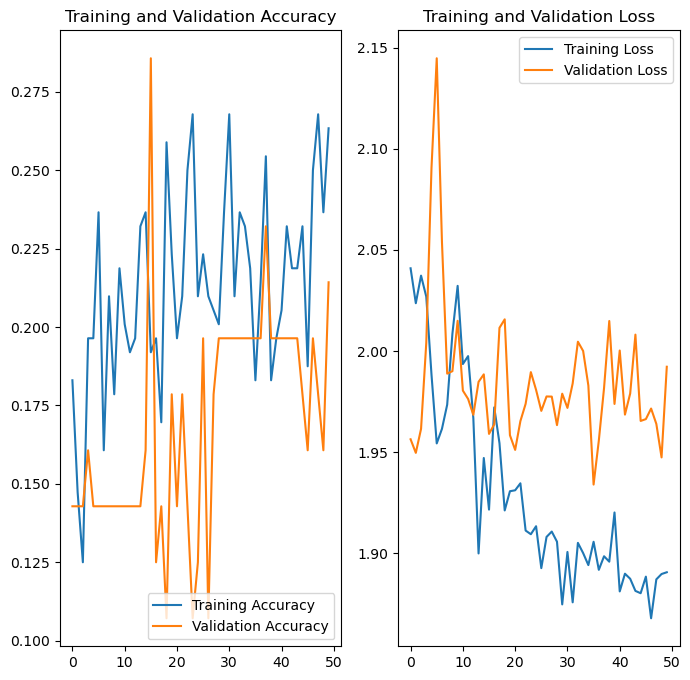

In [ ]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(Epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.evaluate(X_train,y_train)

7/7 [==============================] - 0s 40ms/step - loss: 1.9483 - accuracy: 0.1920


[1.9482738971710205, 0.1919642835855484]

In [ ]:
model.evaluate(X_val,y_val)

2/2 [==============================] - 0s 32ms/step - loss: 1.9923 - accuracy: 0.2143


[1.9922773838043213, 0.2142857164144516]